In [85]:
import os
import pickle
from collections import defaultdict
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
directory = 'bar_chart/basic_model/'
files = [x for x in os.listdir(directory) if 'results' in x and '.txt.txt' not in x]

In [87]:
results_dict = defaultdict(lambda:0)
number_runs = defaultdict(lambda:0)
all_params = []


for file in files:
    param = int(file.split('_')[-2][1:])
    run_number = int(file.split('_')[-1].split('.')[0][1:])

    with open(directory+file, 'rb') as f:
        result = pickle.load(f)

    results_dict[param] += sum(result['deaths'])
    number_runs[param] += 10
    
results_dict = dict(results_dict)
death_number = dict(zip(list(results_dict.keys()), [np.sum(results_dict[p])/number_runs[p] for p in list(results_dict.keys())]))
confidence_intervals = dict(zip(list(results_dict.keys()), [1.96*np.std(results_dict[p])/np.sqrt(number_runs[p]) for p in list(results_dict.keys())]))

In [88]:
def get_index(df, desired_dict):

    subdf = df.copy()

    for keyval in desired_dict:
        if keyval in subdf.columns:
            subdf = subdf[subdf[keyval] == desired_dict[keyval]]
        
    # check that index unique
    if len(list(subdf.index)) != 1:
        print('Index not unique')
        
    return(subdf.index[0])

def get_paramgrid(file):
    with open(file, 'rb') as f:
        paramgrid = pickle.load(f)
    df = pd.DataFrame(paramgrid)  
    return(df)

In [89]:
q = 1
mu = 1e-6
combs_cl = [(100,1000),(100,10000),(500,1000),(500,10000)]

In [90]:
df = get_paramgrid('bar_chart/basic_model/paramgrid_appearance_barchart_basic.txt')

In [91]:
df

,N,a,c,d,delta,i_threshold,mu,q,s_threshold
0,1000000.0,0.25,1000,0.01,1,100,1.000000e-07,0.4,0.1
1,1000000.0,0.25,1000,0.01,1,100,1.000000e-07,1.0,0.1
2,1000000.0,0.25,1000,0.01,1,100,1.000000e-06,0.4,0.1
3,1000000.0,0.25,1000,0.01,1,100,1.000000e-06,1.0,0.1
4,1000000.0,0.25,1000,0.01,1,250,1.000000e-07,0.4,0.1
...,...,...,...,...,...,...,...,...,...
67,1000000.0,0.25,10000,0.01,2,250,1.000000e-06,1.0,0.1
68,1000000.0,0.25,10000,0.01,2,500,1.000000e-07,0.4,0.1
69,1000000.0,0.25,10000,0.01,2,500,1.000000e-07,1.0,0.1
70,1000000.0,0.25,10000,0.01,2,500,1.000000e-06,0.4,0.1


In [92]:
all_bar_results = [] 
all_bar_ci = [] 

for L, c in combs_cl:
    desired_dict = {'mu':mu, 'q':q, 'c':c, 'i_threshold':L, 'delta':1}

    all_bar_results.append(death_number[get_index(df, desired_dict)])
    all_bar_ci.append(confidence_intervals[get_index(df, desired_dict)])

In [93]:
TH = 1e6/(500+10000)*(2/3)
print(TH)

63.492063492063494


In [94]:
60*0.01*500

300.0

In [95]:
theoretical = []
for L, c in combs_cl:
    TH = np.min([(1e6)/(L+c)*(2/3),365])
    print(TH)
    theoretical.append(L*0.01*TH)

365.0
66.006600660066
365.0
63.492063492063494


In [96]:
all_bar_results

[365.696, 73.916, 1806.395, 387.092]

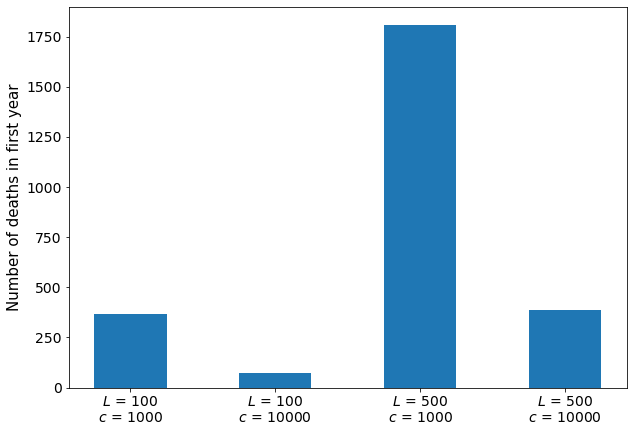

In [97]:
fig, ax = plt.subplots(figsize = (10,7))

ax.bar(np.arange(4), all_bar_results, width = 0.5)
#ax.bar(np.arange(4), theoretical, width = 0.5, fill = False, color = 'k')
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['$L$ = ' + str(x[0]) + '\n$c$ = ' + str(x[1])  for x in combs_cl], fontsize = 14)
ax.set_ylabel('Number of deaths in first year', fontsize = 15)
ax.tick_params(labelsize = 14)
#ax.legend(['Simulated', 'Theoretical'], fontsize = 15)
plt.savefig('deaths_basicmodel_onlysim.jpg', dpi = 400)
plt.show()